<a href="https://colab.research.google.com/github/Yashfa54/EDA-AICP-Internship/blob/main/EDA_Task_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries and read the csv file**

In [ ]:
import pandas as pd

# Read the CSV file
data = pd.read_csv("/content/births.csv")
data

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


**Add a new column “Decade” by calculating. For example 1969 will be 1960, 1988 will 1980 etc.**

In [ ]:
data['Decade'] = (data['year'] // 10) * 10
data

<ipython-input-12-13904c4d3e19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Decade'] = (data['year'] // 10) * 10


,year,month,day,gender,births,Decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15062,1988,12,29.0,M,5944,1980
15063,1988,12,30.0,F,5742,1980
15064,1988,12,30.0,M,6095,1980
15065,1988,12,31.0,F,4435,1980


**Show the descriptive statistics of the data.**

In [ ]:
print(data.describe())

               year         month           day         births
count  15547.000000  15547.000000  15067.000000   15547.000000
mean    1979.037435      6.515919     17.769894    9762.293561
std        6.728340      3.449632     15.284034   28552.465810
min     1969.000000      1.000000      1.000000       1.000000
25%     1974.000000      4.000000      8.000000    4358.000000
50%     1979.000000      7.000000     16.000000    4814.000000
75%     1984.000000     10.000000     24.000000    5289.500000
max     2008.000000     12.000000     99.000000  199622.000000


**Check if your data contains any missing values**

In [ ]:
print(data.isnull().sum())

year        0
month       0
day       480
gender      0
births      0
dtype: int64


**What is the trend of male & female births every decade?**

In [ ]:
trend_per_decade = data.groupby(['Decade', 'gender'])['births'].sum().reset_index()
trend_per_decade


,Decade,gender,births
0,1960,F,1753634
1,1960,M,1846572
2,1970,F,16263075
3,1970,M,17121550
4,1980,F,16336639
5,1980,M,17171471


**To remove outliers from dataset following techinque to include only those values that fall within 5
 standard deviations from the mean.This is a common statistical technique used to focus on the central
 tendency of the data while excluding extreme values.
 Use this technique to remove outliers.**

In [ ]:
mean = data['births'].mean()
std_dev = data['births'].std()
data = data[(data['births'] >= mean - 5 * std_dev) & (data['births'] <= mean + 5 * std_dev)]
mean
std_dev
data

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15309,1999,2,NaN,F,145172
15357,2001,2,NaN,F,148640
15381,2002,2,NaN,F,148745
15405,2003,2,NaN,F,150278


**Plot births by weekday for several decades. Write down your observation.**

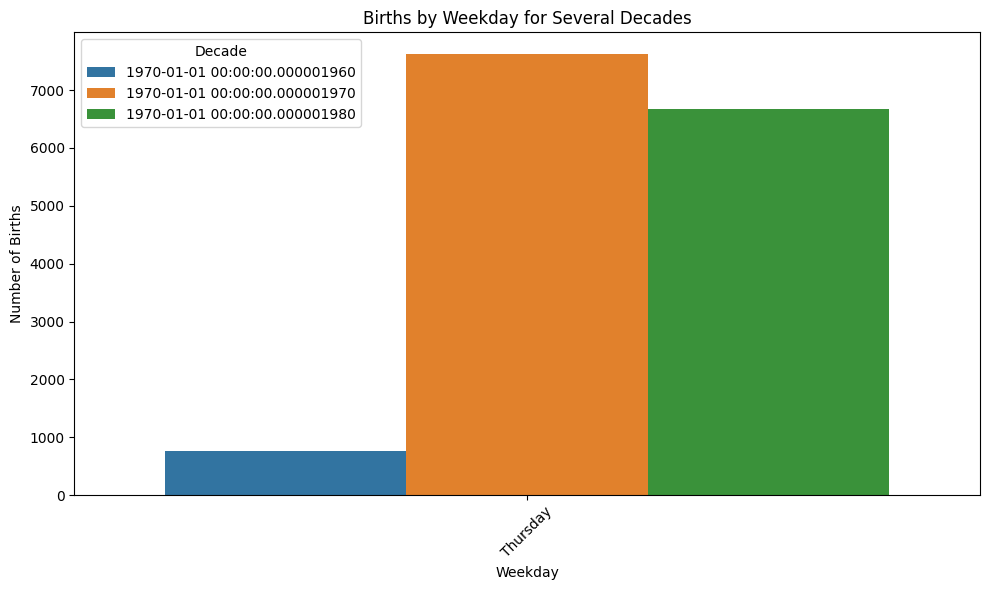

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Remove outliers using the 5 standard deviations technique
mean = data['births'].mean()
std_dev = data['births'].std()
data = data[(data['births'] >= mean - 5 * std_dev) & (data['births'] <= mean + 5 * std_dev)]

# Convert 'Date' column to datetime and add 'Weekday' column
data['Decade'] = pd.to_datetime(data['Decade'])
data['Weekday'] = data['Decade'].dt.strftime('%A')

# Plot births by weekday for several decades
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Weekday', hue='Decade')
plt.title('Births by Weekday for Several Decades')
plt.xlabel('Weekday')
plt.ylabel('Number of Births')
plt.xticks(rotation=45)
plt.legend(title='Decade')
plt.tight_layout()
plt.show()


**Group the data by month and day separately**

In [ ]:
grouped_by_month = data.groupby('month')['births'].sum().reset_index()
grouped_by_day = data.groupby('day')['births'].sum().reset_index()
grouped_by_day
grouped_by_month


,month,births
0,1,5759568
1,2,5363417
2,3,5868651
3,4,5561317
4,5,5785602
5,6,5759233
6,7,6220777
7,8,6310276
8,9,6206785
9,10,6056193


**Focusing on the month and day only, you have a time series reflecting the average number of
 births by date of the year. From this, plot the data.**

In [ ]:
import plotly.express as px
average_births_by_date = data.groupby(['month', 'day'])['births'].mean().reset_index()

# Plot the data
fig = px.line(average_births_by_date, x='day', y='births', title='Average Births by Date of the Year',
              labels={'day': 'Day of the Year', 'births': 'Average Number of Births'})
fig.show()